In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# This simulation relies on the assumption that Conservation of Angular Momentum requires the orbiting bodies to lie in 
# the same plane. Therefore, the analysis can be conducted in 2-dimensional space.

def planet_1(m1,m2,msun,r2,rsun,theta2,thetasun):
    
    def gravity_sun(msun,m1,r):
        #https://physics.nist.gov/cgi-bin/cuu/Value?bg
        G = 6.67430*(10**-11)
        return(-G*msun*m1/(r**2))
    
    def gravity_m2(m2,m1,r):
        #https://physics.nist.gov/cgi-bin/cuu/Value?bg
        G = 6.67430*(10**-11)
        return(-G*m2*m1/(r**2))
    
    def fx(m1,m2,msun,r2,rsun,thetasun,theta2): # sum of forces in x direction
        gsun = gravity_sun(msun,m1,rsun)
        gm2 = gravity_m2(m2,m1,r2)
        return(np.cos(thetasun)*gsun + np.sin(theta2)*gm2)
    
    def fy(m1,m2,msun,r2,rsun,thetasun,theta2): # sum of forces in y direction
        gsun = gravity_sun(msun,m1,rsun)
        gm2 = gravity_m2(m2,m1,r2)
        return(np.sin(thetasun)*gsun + np.cos(theta2)*gm2)
    
    def ax(m1,m2,msun,r2,rsun,thetasun,theta2): # sum of acceleration in x direction
        return(fx(m1,m2,msun,r2,rsun,thetasun,theta2)/m1)
     
    def ay(m1,m2,msun,r2,rsun,thetasun,theta2): # sum of acceleration in the y direction
        return(fy(m1,m2,msun,r2,rsun,thetasun,theta2)/m1)
    
    return(gravity_sun(msun,m1,rsun), gravity_m2(m2,m1,r2), fx(m1,m2,msun,r2,rsun,thetasun,theta2),
           fy(m1,m2,msun,r2,rsun,thetasun,theta2),ax(m1,m2,msun,r2,rsun,thetasun,theta2),
           ay(m1,m2,msun,r2,rsun,thetasun,theta2))
    

In [6]:
def planet_2(m1,m2,msun,r1,rsun,theta2,thetasun):
    
    def gravity_sun(msun,m1,r):
        #https://physics.nist.gov/cgi-bin/cuu/Value?bg
        G = 6.67430*(10**-11)
        return(-G*msun*m1/(r**2))
    
    def gravity_m1(m2,m1,r):
        #https://physics.nist.gov/cgi-bin/cuu/Value?bg
        G = 6.67430*(10**-11)
        return(-G*m2*m1/(r**2))
    
    def fx(m1,m2,msun,r1,rsun,thetasun,theta2):
        gsun = gravity_sun(msun,m1,rsun)
        gm2 = gravity_m1(m2,m1,r1)
        return(np.cos(thetasun)*gsun + np.sin(theta2)*gm2)
    
    def fy(m1,m2,msun,r1,rsun,thetasun,theta2):
        gsun = gravity_sun(msun,m1,rsun)
        gm2 = gravity_m1(m2,m1,r1)
        return(np.sin(thetasun)*gsun + np.cos(theta2)*gm2)
    
    def ax(m1,m2,msun,r2,rsun,thetasun,theta2):
        return(fx(m1,m2,msun,r2,rsun,thetasun,theta2)/m2)
    
    def ay(m1,m2,msun,r2,rsun,thetasun,theta2):
        return(fy(m1,m2,msun,r2,rsun,thetasun,theta2)/m2)
    
    return(gravity_sun(msun,m2,rsun),gravity_m1(m2,m1,r1),fx(m1,m2,msun,r1,rsun,thetasun,theta2),
           fy(m1,m2,msun,r1,rsun,thetasun,theta2),ax(m1,m2,msun,r1,rsun,thetasun,theta2),
          ay(m1,m2,msun,r1,rsun,thetasun,theta2))
    

In [7]:
#Establish masses
#https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html

msun = 1988500*(10**24)
m1 = 5.9724*(10**24) # mass of Earth
m2 = 4.87*(10**24) # mass of Venus

In [14]:
#Establish distances

sun_pos = [0,0]
p1_pos = [1000000,0]
p2_pos = [0,2000000]

x12 = p1_pos[0]-p2_pos[0]
y12 = p1_pos[1]-p2_pos[1]
rsun_1 = np.sqrt((p1_pos[0]**2) + (p1_pos[1]**2))
rsun_2 = np.sqrt((p2_pos[0]**2) + (p2_pos[1]**2))
r12 = np.sqrt((x12**2)+(y12**2)) 

In [9]:
#Establish angles
theta2 = np.arctan(x12/y12)
if p1_pos[0] == 0:
    thetasun_1 = np.pi/2
else:
    thetasun_1 = np.arctan(p1_pos[1]/p1_pos[0])
    
if p2_pos[0] == 0:
    thetasun_2 = np.pi/2
else:
    thetasun_2 = np.arctan(p2_pos[1]/p2_pos[0])

In [10]:
sun_on_p1, p2_on_p1, net_f_x_1, net_f_y_1, ax_1, ay_1 = planet_1(m1,m2,msun,r12,rsun_1,theta2,thetasun_1) 

sun_on_p2, p1_on_p2, net_f_x_2, net_f_y_2, ax_2, ay_2 = planet_2(m1,m2,msun,r12,rsun_2,theta2,thetasun_2)

<Figure size 432x288 with 0 Axes>

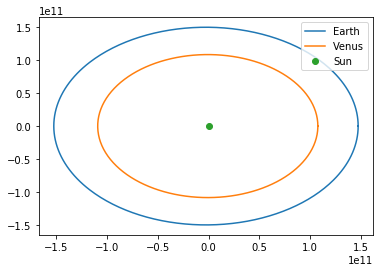

TypeError: animate() takes 3 positional arguments but 4 were given

In [139]:
from matplotlib import animation
from IPython.display import HTML

# using Kepler's Law to plot elliptical orbits of Earth and Venus around the Sun
# https://nssdc.gsfc.nasa.gov/planetary/factsheet/venusfact.html

def find_r(a, e, theta):
    r = (a * (1 - e**2)) / (1 + e*np.cos(theta)) # Using Kepler's First Law of Planetary Motion
    x = r*np.cos(theta) # changing from polar to cartesian coordinates
    y = r*np.sin(theta)
    return x, y
    
a_m1 = 149.6 * 10**9 # semi-major axis of Earth's orbit (meters)
e_m1 = 0.0167 # Earth's eccentricity

a_m2 = 108.21 * 10**9 # semi-major axis of Venus's orbit (meters)
e_m2 = 0.0067 # Venus's eccentricity

theta_list = np.linspace(0, 2*np.pi, 365)
x1, y1 = find_r(a_m1, e_m1, theta_list)
x2, y2 = find_r(a_m2, e_m2, theta_list)
plt.figure()
plt.show()
plt.figure()
plt.plot(x1, y1, label = 'Earth')
plt.plot(x2, y2, label = "Venus")
plt.plot(0,0, 'o', label="Sun")
plt.legend(loc='upper right')
plt.show() 

fig, ax = plt.subplots()
ax.set_xlim((-5,5))
ax.set_ylim((-5,5))
plt.close(fig)
ellipse, = ax.plot([],[])

def init():
    ellipse.set_data([],[])
    return(ellipse,)

def animate(a, e, theta):
    x, y = find_r(a, e, theta)
    ellipse.set_data(x, y)
    return(ellipse,)
    
ani1 = animation.FuncAnimation(fig, animate, frames = None, init_func = init, fargs = [a_m1, e_m1, theta_list], interval = 100, blit = False)
ani2 = animation.FuncAnimation(fig, animate, frames = None, init_func = init, fargs = [a_m2, e_m2, theta_list], interval = 100, blit = False)

HTML(ani1.to_jshtml())
HTML(ani2.to_jshtml())




    

    
    
    
    
    